In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [2]:
sf = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
sf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
sf=sf.assign(total_marks=sf['math score']+sf['reading score']+sf['writing score'])

In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total_marks                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
sf.gender.replace(('female', 'male'), (1, 0), inplace=True)
sf.lunch.replace(('standard', 'free/reduced'), (1, 0), inplace=True)
sf['test preparation course'].replace(('completed', 'none'), (1, 0), inplace=True)

In [7]:
sf.describe()

,gender,lunch,test preparation course,math score,reading score,writing score,total_marks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.518000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000
50%,1.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000


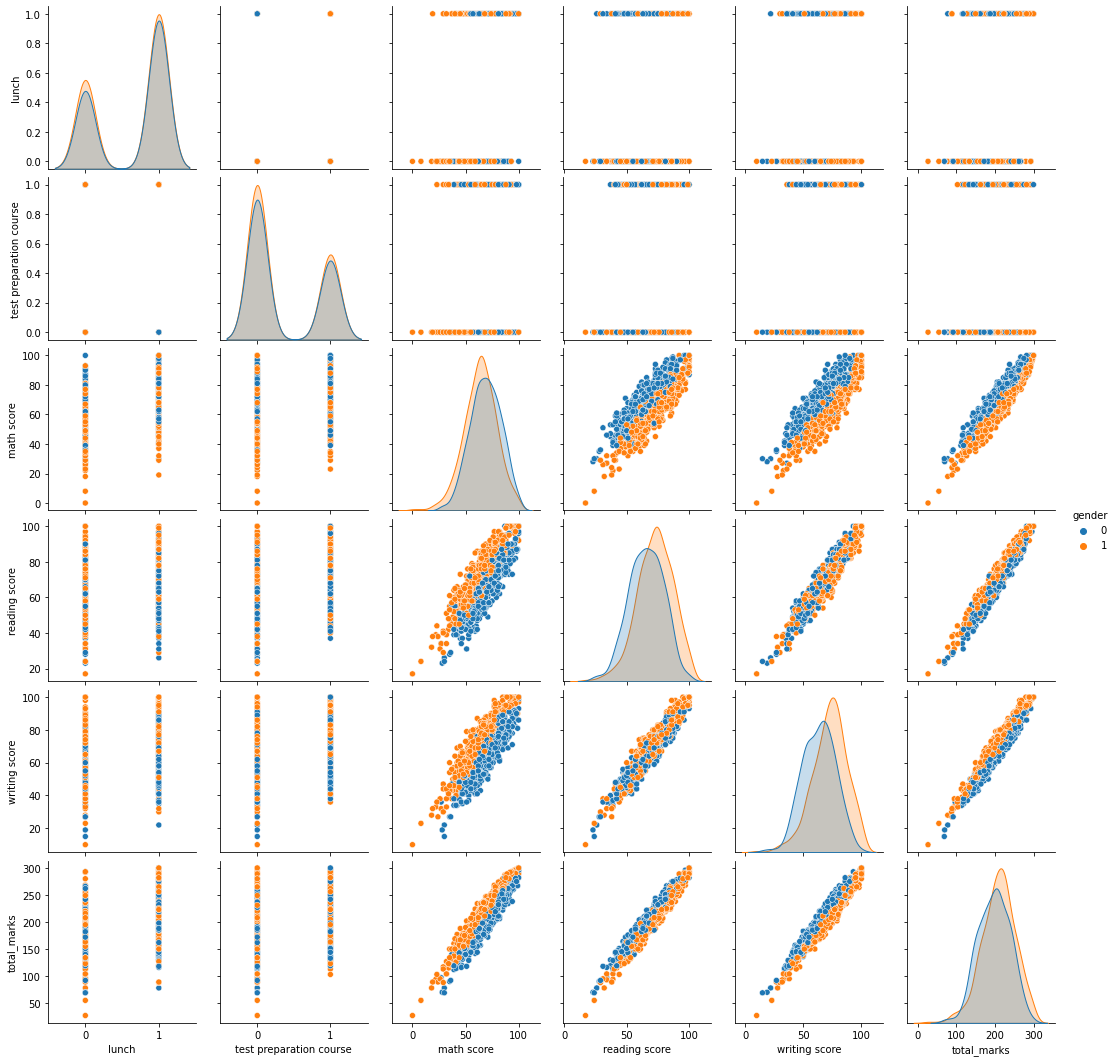

In [8]:
sb.pairplot(sf, hue = "gender")

In [9]:
sf.gender.replace(('female', 'male'), (1, 0), inplace=True)
sf.lunch.replace(('standard', 'free/reduced'), (1, 0), inplace=True)
sf['test preparation course'].replace(('completed', 'none'), (1, 0), inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_marks', ylabel='Density'>

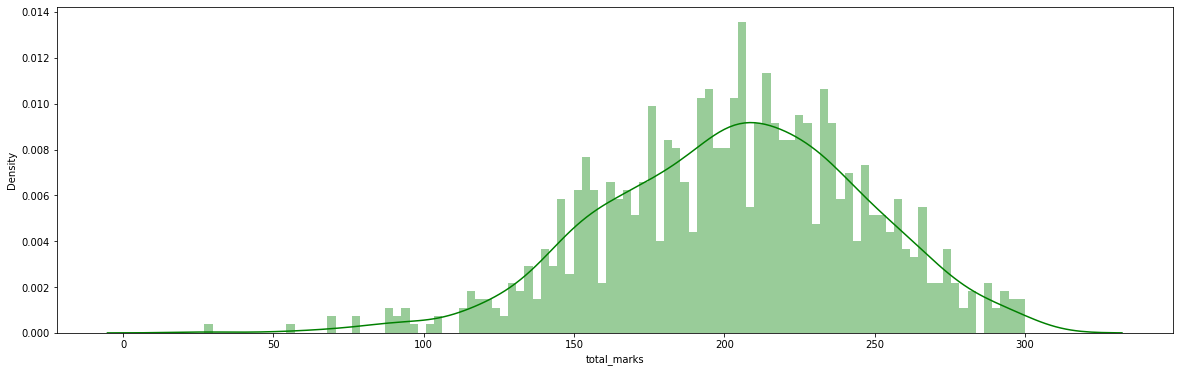

In [10]:
ax= plt.figure(figsize=(20,6))
sb.distplot(sf['total_marks'], bins=100,color='green')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

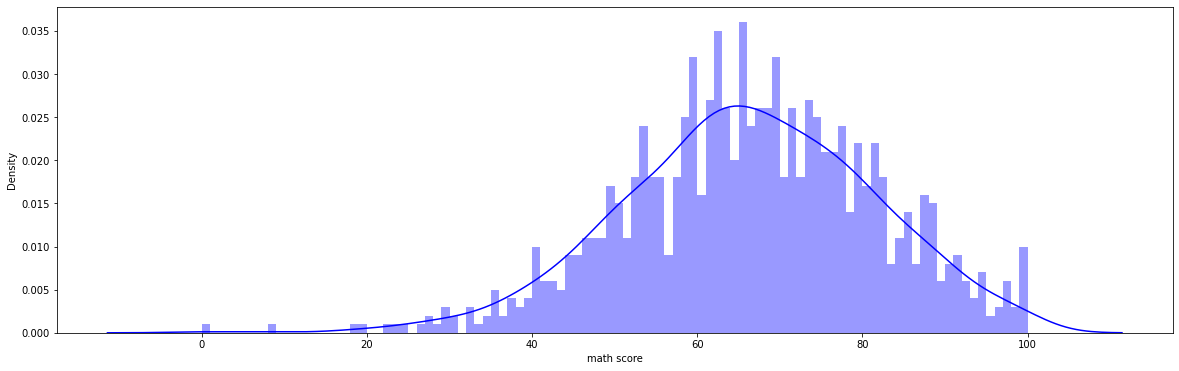

In [11]:
ax= plt.figure(figsize=(20,6))
sb.distplot(sf['math score'], bins=100,color='blue')


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

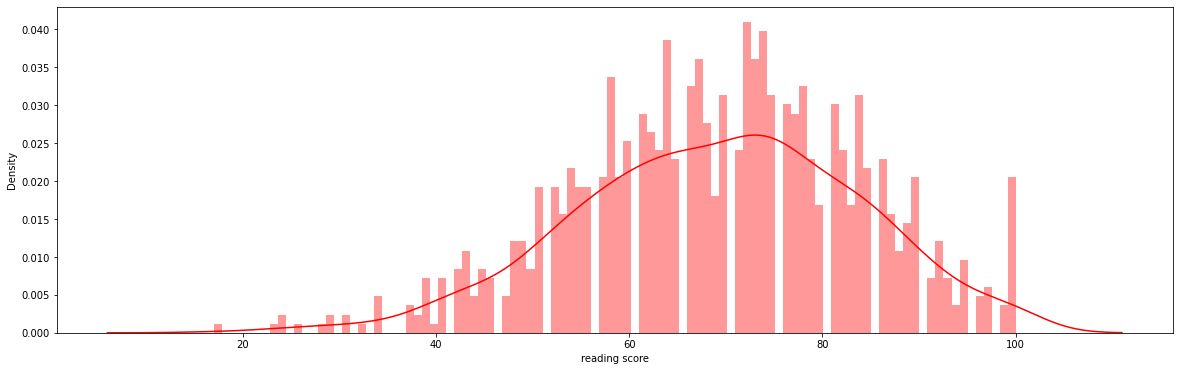

In [12]:
ax= plt.figure(figsize=(20,6))
sb.distplot(sf['reading score'], bins=100,color='red')


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

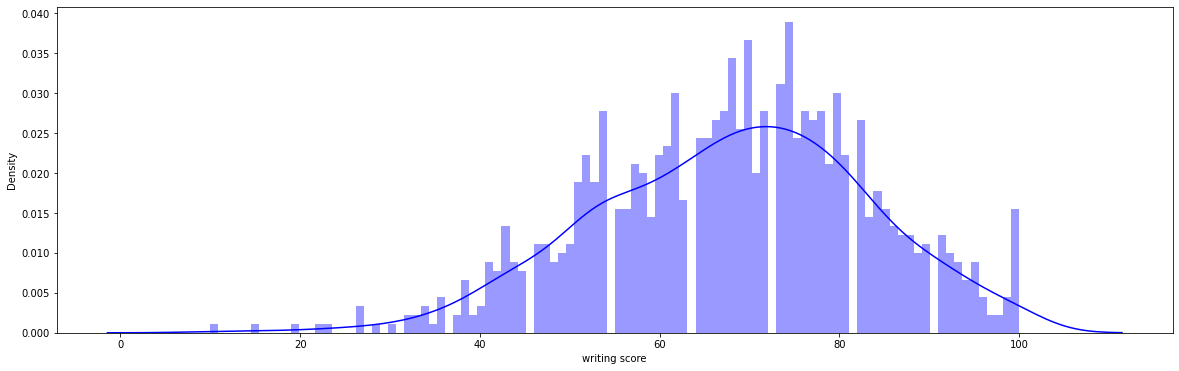

In [13]:
ax= plt.figure(figsize=(20,6))
sb.distplot(sf['writing score'], bins=100,color='blue')

<AxesSubplot:xlabel='race/ethnicity'>

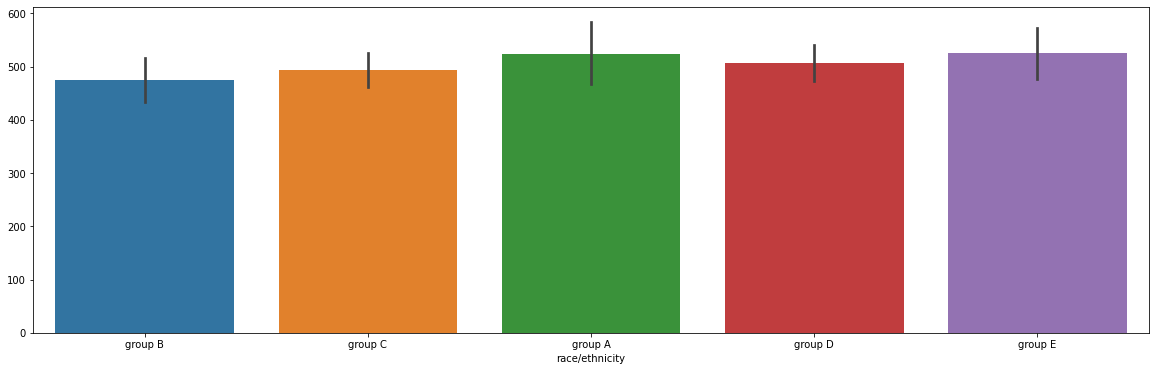

In [14]:
ax= plt.figure(figsize=(20,6))
sb.barplot(x='race/ethnicity',y=np.arange(1,1001),data=sf)

<AxesSubplot:xlabel='parental level of education'>

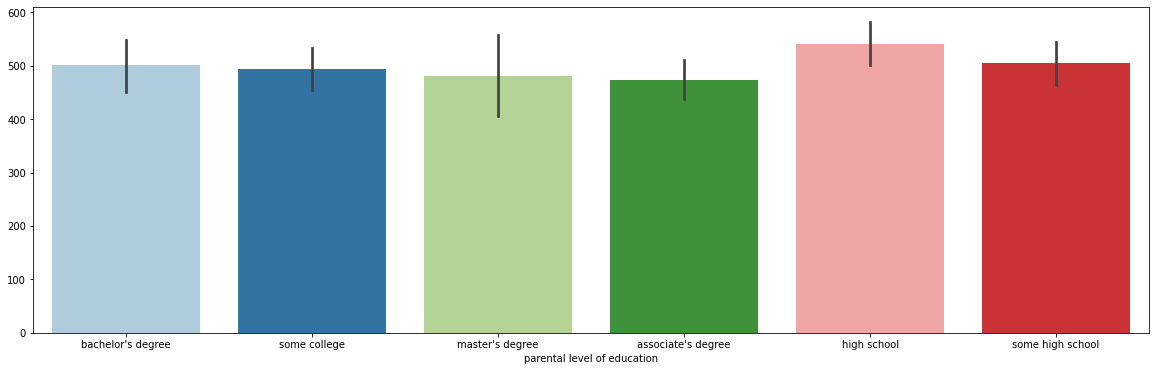

In [15]:
ax= plt.figure(figsize=(20,6))
sb.barplot(x='parental level of education',y=np.arange(1,1001),data=sf,palette='Paired')

<AxesSubplot:xlabel='lunch'>

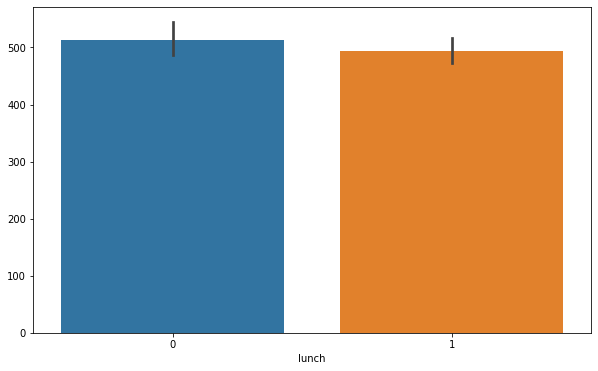

In [16]:
ax= plt.figure(figsize=(10,6))
sb.barplot(x='lunch',y=np.arange(1,1001),data=sf)

<AxesSubplot:xlabel='total_marks'>

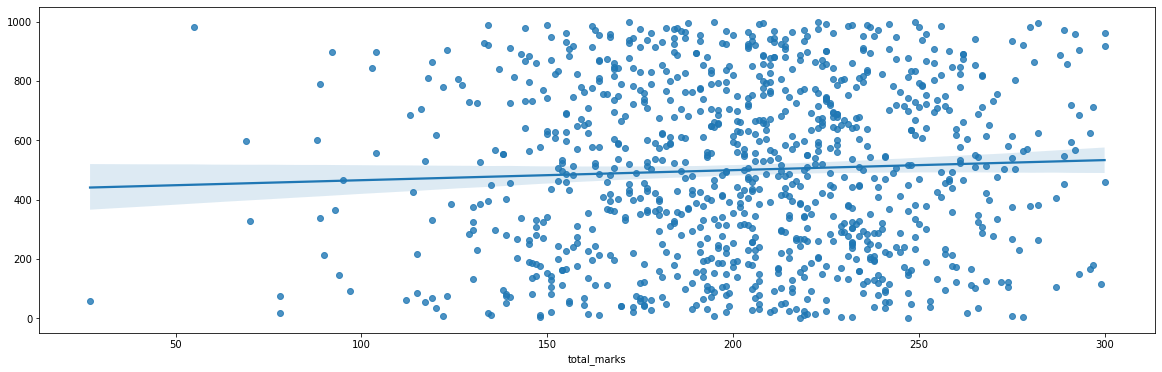

In [17]:
ax= plt.figure(figsize=(20,6))
sb.regplot(x='total_marks',y=np.arange(1,1001),data=sf)

<AxesSubplot:>

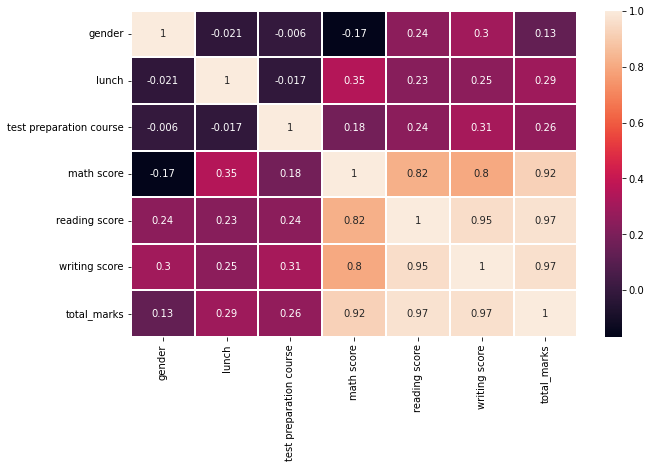

In [18]:
ax= plt.figure(figsize=(10,6))
corr= sf.corr()
sb.heatmap(corr,annot=True,linewidths=2)

In [19]:
x=sf[['gender']]
y=sf['total_marks']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred)*100)
r2

0.1903409302414616

**Conclusion :** The R squared value being too low so gender isnt that significant to score